## Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
## Kaiser Lab 
## January 28, 2022

# II.1 Dipoles

II.1 Calculation of the dipole moment of adenine. Calculate the dipole moment of adenine (the x and y components, µx and µy, as well as the magnitude |µ|) and visualize it as a vector plotted on top of the adenine structure.

The tab-separated values file Adenine_qxy.txt contains the partial charges (in elementary charges, qe) and positions (in Å) for all atoms in the adenine structure.

The contributions of the individual atoms are additive, so as discussed in class, we calculate the x and y components of the dipole moment according to

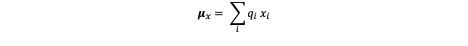
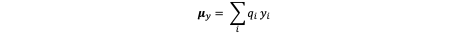

where qi is the partial charge of atom i and xi and yi are the coordinates of the atom. Adenine is planar, so we do not need the third (z) dimension here. 

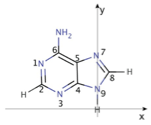

The position of each atom is designated in a coordinate system with its origin at the H atom at position 9 and with the H-N9 bond parallel to the y-axis.

The charge values in the text file are net charge densities that already include the contributions of both the positive and negative charges at each atom position.

The magnitude of the dipole moment has dimensions of charge*distance. In SI units, the charge is expressed in coulombs (C) and the length in meters (m). A special unit, the debye (D), has been defined for dipole moments.

To convert the units used in the table (elementary charge, qe, and Å) to debye (D), multiply with 4.803:
1 D = 4.803 qe Å

Import Adenine_qxy.txt as a pandas dataframe to calculate the dipole moment. The headers are: Atom, Element, qi, xi, yi

In [1]:
# These are the libraries you will need for this lab

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re # This is very useful for matching strings using re.search(string,var)



# Student Input Cell:
  

In [2]:
# Import Data, as a pandas dataframe

# The headers are: Atom, Element, qi, xi, yi
df = pd.read_csv('Adenine_qxy(1).txt', sep='\t')
df['ux'] = df['qi']*df['xi']*4.803
df['uy'] = df['qi']*df['yi']*4.803
df

,Atom,Element,qi,xi,yi,ux,uy
0,N1,N,-0.52,-2.791,3.937,6.970690,-9.832894
1,C2,C,0.31,-3.201,2.664,-4.766065,3.966510
2,N3,N,-0.51,-2.391,1.608,5.856826,-3.938844
3,C4,C,0.33,-1.079,1.828,-1.710204,2.897362
4,C5,C,0.12,-0.604,3.113,-0.348121,1.794209
5,C6,C,0.34,-1.500,4.163,-2.449530,6.798262
6,N7,N,-0.56,0.763,3.128,-2.052226,-8.413319
7,C8,C,0.32,1.055,1.810,1.621493,2.781898
8,N9,N,-0.19,0.000,1.000,-0.000000,-0.912570
9,H2,H,0.07,-4.284,2.473,-1.440324,0.831447


# Student Input Cell:


In [3]:
# Calculate the dipole moment & magnitude
ux_sum = df['ux'].sum()
uy_sum = df['uy'].sum()
mag = np.sqrt(ux_sum**2 + uy_sum**2)
(ux_sum, uy_sum, mag)

(2.5522181400000004, -2.0230235999999993, 3.256753279003802)

# Student Input Cell:

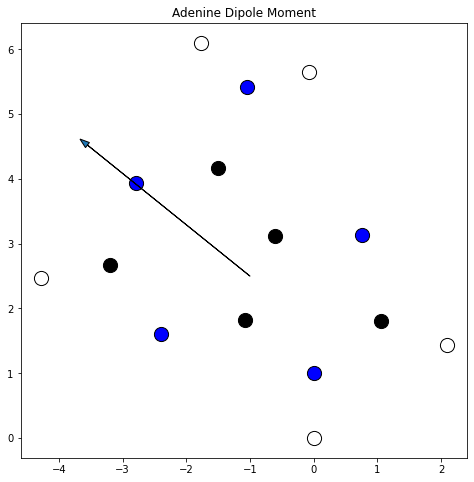

In [4]:
# Plot the atomic coordinates for adenine. Make sure the aspect ratio for both axes are equal.
#
# Hydrogen: white
# Carbon: black
# Nigrogen: blue
fig, ax = plt.subplots(figsize=(8,8))

for idx, row in df.iterrows():

    elem = row['Element']
    if elem == 'N':
        color = 'b'
    elif elem == 'C':
        color = 'k'
    else:
        color = 'w'
    
    plt.scatter(row['xi'], row['yi'], color=color, edgecolors='k', s=200)

#plt.scatter(df['xi'], df['yi'], color='k')    
    
# Plot dipole vector
#
# Use the matplotlib "arrow" tool. I recommend making the head_width = 0.1
#
# NOTE: The dipole vector you calculated points toward the positive dipole, HOWEVER common
# convention is to draw the arrow pointing to the NEGATIVE dipole, so make sure you adjust
# for this.

plt.arrow(-1, 2.5, -ux_sum, -uy_sum, head_width=0.1)

plt.title('Adenine Dipole Moment')
plt.savefig('adenine_dipole.jpg')
plt.show()

# II.3 Dipole-Dipole vs. Ion-Ion interactions

Plot the energies for a dipole-dipole and for an ion-ion interaction as a function of distance from 3 to 10 Å such that their magnitudes are 1 at r = 3 Å. How does the distance dependence compare for the two types of interactions?


# Student Input Cell:


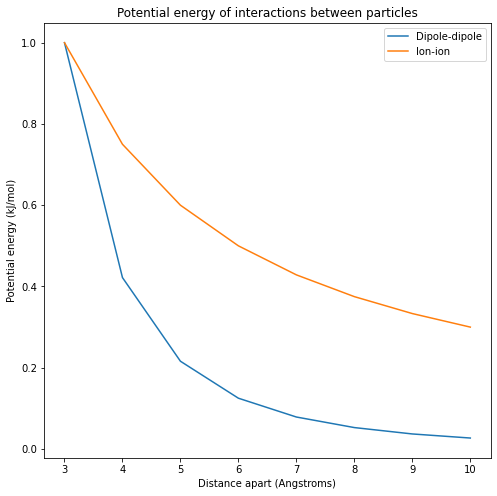

In [5]:
# Plot energies of ion-ion and dipole-dipole interactions vs. distance
"""
I aggregated the terms that would be held constant in both 
equations (charge, permittivity, etc) into one constant, 
and then solved for it by plugging in U(3)=1. For dipole-dipole 
interactions, this gave me U(r)=1/(r^3) while for ion-ion 
interactions, U(r)=1/r.
"""


x = list(range(3,11))
dipole = [27/r**3 for r in x]
ion = [3/r for r in x]

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(x, dipole, x, ion)

plt.title('Potential energy of interactions between particles')
plt.xlabel('Distance apart (Angstroms)')
plt.ylabel('Potential energy (kJ/mol)')
plt.legend(['Dipole-dipole', 'Ion-ion'])
plt.savefig('interaction_nrgs.jpg')
plt.show()